# Лінійна регресія

У цьому домашньому завданні ми працюємо з набором даних про рівень щастя у країнах за 2019 рік. Він доступний в кабінеті або можна завантажити з Kaggle [змагання](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv).

Усі імпорти розміщуємо зверху, під цією секцією.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet

1. Зчитайте дані за допомогою pandas у змінну `df`.

In [2]:
df = pd.read_csv('/Users/vitamajstrenko/Desktop/robot_dreams/4/world happiness/2019.csv')

2. Виведіть діаграму розсіювання ознак `Score` та `GDP per capita`, використовуючи метод `regplot()` з `seaborn`.

<Axes: xlabel='GDP per capita', ylabel='Score'>

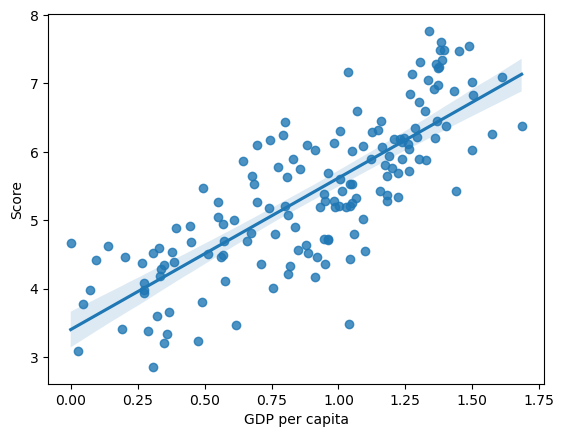

In [3]:
sns.regplot(data=df, x='GDP per capita', y='Score' )

Ми моделюватимемо цю залежність. Тобто незалежною змінною є `GDP per capita`, залежною `Score`. Судячи з діаграми розсіювання, залежність між цими двома змінними має добре описуватись лінійною моделлю.

## Розв'язання задачі лінійної регресії методом градієнтного спуску

Позначення:
- `X` - матриця ознак
- `y` - цільова змінна
- `theta` - вектор параметрів
- `alpha` - темп навчання (learning rate)

<font color='blue'>**[Optional]**</font> 3. Реалізуйте формулу передбачення лінійної регресії у методі `predict`. Метод повертає передбачення. Нагадаю, що для кожного спостереження з матриці ознак передбачення знаходимо за допомогою наступної формули:
$$x \in X, i \in [1,m], j : \\ \hat{y}_i = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n = \theta^T x ,\\
\text{де m - кількість спостережень, } \\ 
\text{n - кількість ознак, } \\
x_0 = 1 \ \text{для всіх спостережень}.
$$

Передбачення всіх спостережень у матриці Х можемо знайти як множення матриці ознак на ваги.

In [4]:
def predict(X, theta):
    prediction = np.dot(X, theta)
    return prediction

<font color='blue'>**[Optional]**</font> 4. Доповніть обчислення значення функції витрат, формула якої наведена в слайдах лекції про лінійну регресію (підказка - формула така сама, якби ми рахували середньоквадратичну помилку).  
Метод `cost()` приймає вектор параметрів `theta`, матрицю наших ознак `X` та реальні значення цільової змінної `y`.


In [5]:
def cost(y_true, y_estimate):
    m = len(y)
    cost_value = (1/(2*m)) * np.sum((y_estimate - y_true)**2)
    return cost_value

<font color='blue'>**[Optional]**</font> 5. Ознайомтеся з реалізацією методу `get_gradient()`, який повертає вектор часткових похідних функції витрат за кожним із параметрів лінійної регресії.
Доповніть метод `gradient_descent()`, який дозволить реалізувати алгоритм градієтного спуску. Під час градієнтного спуку ми оновлюємо параметри згідно з формулою:
$$
\text{для кожного} \ j \in [0, n]: \quad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta), \\ 
\text{де n - кількість ознак}
$$
  Метод градієнтного спуску оновлює ваги (модель навчається) поки вони не перестануть змінюватися від ітерації до ітерації, тобто поки Евклідова відстань (звичайна відстань між веткорами, як у шкільній геометрії) між векторами ваг за останні дві ітерації не буде меншою за невелику константу (зазвичай позначається як $\epsilon$ (епсілон), ми встановимо $\epsilon=10^{-6}$).

В `gradient_descent()` заповніть всі місця, де стоять три крапки. Використовуйте реалізовані у попередніх завданнях методи `cost()` та `predict()`, і звичайно ж Вам знадобиться метод `get_gradient()`.

In [6]:
def get_gradient(X, y, y_estimate):
    m = len(y)
    gradient = (1/m) * np.dot(X.T, (y_estimate - y))
    return gradient

In [7]:
def gradient_descent(X, y, theta, learning_rate, eps, max_iterations):
    cost_history = []
    theta_history = []
    iterations = 1
    while True:
        y_estimate = predict(X, theta) # передбачення з поточними значеннями вагів
        gradient = get_gradient(X, y, y_estimate) # значення часткових похідних функції витрат з поточними значеннями ваг
        cost_value = cost(y, y_estimate) # значення функції витрат при поточних вагах
        cost_history.append(cost_value)
        new_theta = theta - learning_rate * gradient
        theta_history.append(new_theta)
        # Умова зупинки, описана в умові завдання
        if np.linalg.norm(new_theta - theta) < eps:
            print("Алгоритм зійшовся.")
            break
            
        # Друга умова зупинки
        if iterations >= max_iterations:
            print("Досягнуто максимальної кількості ітерацій")
            break

        # Виводимо інформацію кожні 100 ітерацій
        if iterations % 100 == 0:
            print ("Ітерація: %d - Помилка на трейн даних: %.4f" % (iterations, cost_value))

        iterations += 1
        theta = new_theta
    return theta, cost_history, theta_history, iterations


Підготуємо дані.

In [8]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

6. Розділіть `X` та `y` на `train` і `test` підвиборки у співвідношенні 80/20. Оскільки у нас мало даних, валідаційну вибірку не виділятимемо. Запишіть результати у `X_train`, `y_train`, `X_test`, `y_test`.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7.Реалізуйте масштабування ознак із використанням `MinMaxScaler`. Пам'ятайте про те, як ми застосовуємо масштабування ознак на`train` та `test` вибірках.

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<font color='blue'>**[Optional]**</font> 8. Додайте колонку з одиниць до масивів `X_train`, `X_test`.

In [11]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

<font color='blue'>**[Optional]**</font> 9. Встановіть темп навчання рівний 0.01, точність епсілон рівний $10^{-6}$, кількість ітерацій дорівнює 20000 і запустіть градієнтний спуск на тренувальні дані, передавши всі необхідні параметри.

In [12]:
learning_rate = 0.01
max_iterations = 20000
epsilon = 1e-6

theta = np.random.randn(2, 1)

theta, cost_history, theta_history, iterations = gradient_descent(X_train, y_train, theta, learning_rate, epsilon, max_iterations)

Ітерація: 100 - Помилка на трейн даних: 0.5497
Ітерація: 200 - Помилка на трейн даних: 0.2771
Ітерація: 300 - Помилка на трейн даних: 0.2554
Ітерація: 400 - Помилка на трейн даних: 0.2419
Ітерація: 500 - Помилка на трейн даних: 0.2308
Ітерація: 600 - Помилка на трейн даних: 0.2215
Ітерація: 700 - Помилка на трейн даних: 0.2138
Ітерація: 800 - Помилка на трейн даних: 0.2074
Ітерація: 900 - Помилка на трейн даних: 0.2021
Ітерація: 1000 - Помилка на трейн даних: 0.1976
Ітерація: 1100 - Помилка на трейн даних: 0.1939
Ітерація: 1200 - Помилка на трейн даних: 0.1909
Ітерація: 1300 - Помилка на трейн даних: 0.1883
Ітерація: 1400 - Помилка на трейн даних: 0.1862
Ітерація: 1500 - Помилка на трейн даних: 0.1844
Ітерація: 1600 - Помилка на трейн даних: 0.1829
Ітерація: 1700 - Помилка на трейн даних: 0.1817
Ітерація: 1800 - Помилка на трейн даних: 0.1806
Ітерація: 1900 - Помилка на трейн даних: 0.1798
Ітерація: 2000 - Помилка на трейн даних: 0.1791
Ітерація: 2100 - Помилка на трейн даних: 0.1785
І

<font color='blue'>**[Optional]**</font> 10. Відобразіть на лінійному графіку значення змінної `cost_history`. Використовуйте будь-яку бібліотеку для візуалізації на вибір.

Text(0.5, 1.0, 'Cost History')

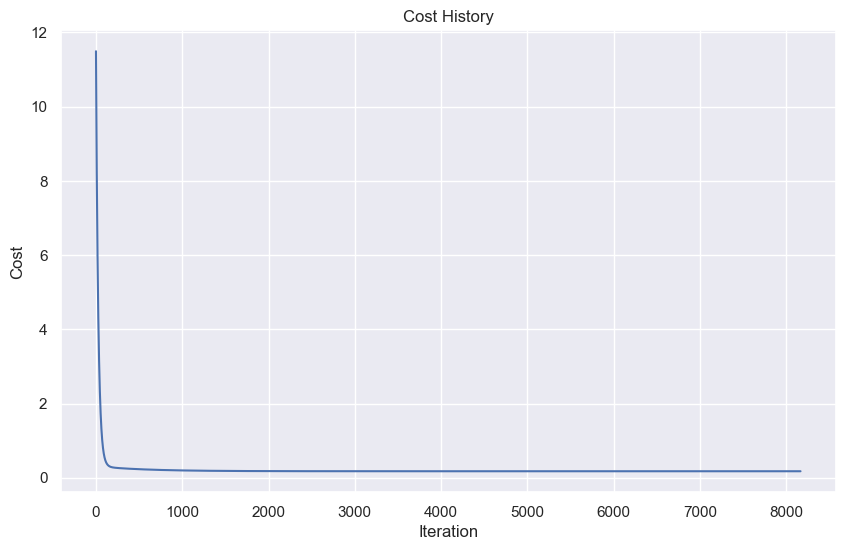

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')

Відобразіть лише перші 200 ітерацій. Схоже, що після них модель мало навчається. Ми могли б застосувати техніку early stopping у даному випадку та зупинитися на деякій невеликій кількості ітерацій. Зазвичай ця техніка застосовується, щоб уникнути перенавчання. При цьому втрачається трохи точності на train set.

Text(0.5, 1.0, 'Cost History (First 200 iterations)')

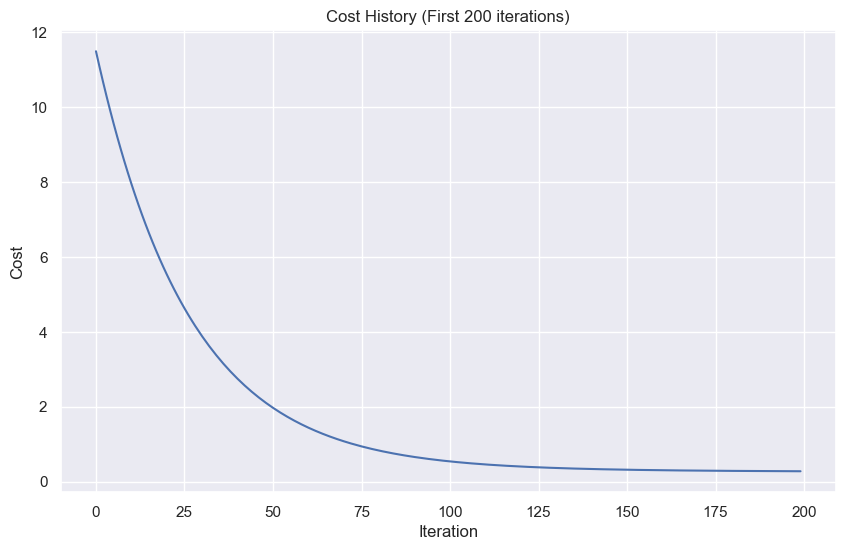

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(range(200), cost_history[:200])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History (First 200 iterations)')

Виведемо отримані параметри та останнє значення функції витрат.

In [15]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][-1],theta[1][-1]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Number of iterateions: {:d}'.format(iterations))

Theta0:          3.420,
Theta1:          2.204
Final cost/MSE:  0.176
Number of iterateions: 8166


<font color='blue'>**[Optional]**</font> 11. Знайдіть прогнози на `X_train`, `X_test` та порахуйте `mean_squared_error` помилку прогнозів обох підвибірках.

In [16]:
y_train_pred = predict(X_train, theta)
y_test_pred = predict(X_test, theta)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'for X_train MSE: {mse_train}')
print(f'for X_test MSE: {mse_test}')

for X_train MSE: 0.44172130133960524
for X_test MSE: 0.5078882618045921


<font color='blue'>**[Optional]**</font> 12. Виведіть діаграму розсіювання ознак `Score` та `GDP per capita` та додайте лінію прогнозу моделі.

Text(0.5, 1.0, 'Scatter plot with Model Prediction')

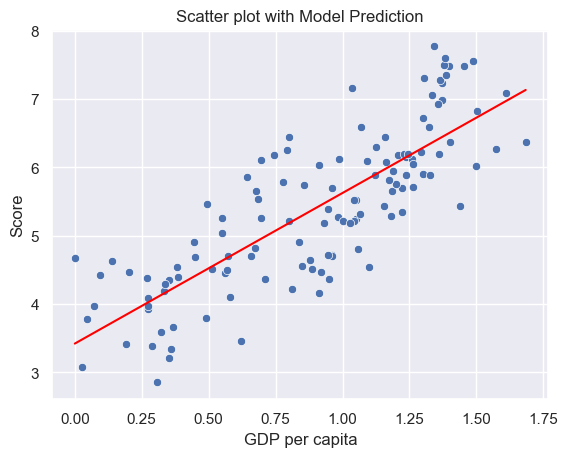

In [17]:
data = pd.DataFrame({'GDP per capita': X_train[:, 1].flatten(), 'Score': y_train.flatten(), 'Prediction': y_train_pred.flatten()})

# Scatter plot
sns.scatterplot(x='GDP per capita', y='Score', data=data)

# Line plot representing model's prediction
sns.lineplot(x='GDP per capita', y='Prediction', data=data, color='red')

# Set labels and title
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.title('Scatter plot with Model Prediction')

13. Навчіть лінійну регресію на наборі даних, що складається тільки з ознаки `GDP per capita`, але тепер використовуючи LinearRegression з sklearn.   
Подумайте, чи треба в sklearn модель подавати стовпчик з одиниць, яку ми подавали в самописну модель.

In [18]:
model = LinearRegression()
model.fit(X_train[:, 1].reshape(-1, 1), y_train)

y_train_pred = model.predict(X_train[:, 1].reshape(-1, 1))
y_test_pred = model.predict(X_test[:, 1].reshape(-1, 1))

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'For X_train MSE: {mse_train}')
print(f'For X_test MSE: {mse_test}')

For X_train MSE: 0.4417211923118578
For X_test MSE: 0.5079112698997723


Порівняйте помилку на тестовій вибірці лінійної регресії, написаної вами, та зі sklearn. Чи є різниця у значеннях?

In [ ]:
#  LinearRegression з sklearn автоматично додає bias term тому стовпчик з 1 не потрібний
# різниця є, але вона мізерна (десятитисячні) 

14. Навчимо лінійну регресію на більшій кількості ознак і подивимося, чи вдасться покращити модель.

14.1 Навчіть лінійну регресію з sklearn використовуючи як набор ознак наступний: `GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Perceptions of corruption`

Не забудьте:  
1. Розділити `train` та `test`.
2. Нормувати кожну колонку даних. 

In [19]:
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

target = 'Score'

# Розділення на train та test
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізація даних
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Навчання моделі лінійної регресії
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Прогнозування на тренувальних та тестових даних
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

14.2 Виведіть помилку прогнозу на `train` та `test` вибірках. Порівняйте з результатом, отриманим під час навчання однією ознакою. Чи змінилися метрики?

In [20]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'For X_train MSE: {mse_train}')
print(f'For X_test MSE: {mse_test}')

For X_train MSE: 0.23646992155921956
For X_test MSE: 0.41446413835283513


In [ ]:
# різниця між результатом на тренувальній та тестовій вибірці - майже в два рази - можливо є перенавчання. 

14.3 Виведіть коефіцієнти моделі і визначте, які ознаки мають найбільші коефіцієнти по модулю, що стоять перед ними (достатньо вивести назви ознак і коефіцієнти в одному датафреймі).

In [21]:
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})

coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Absolute Coefficient', ascending=False)
coef_df

,Feature,Coefficient,Absolute Coefficient
1,Social support,2.001295,2.001295
0,GDP per capita,1.264207,1.264207
2,Healthy life expectancy,1.062208,1.062208
3,Freedom to make life choices,0.940072,0.940072
5,Perceptions of corruption,0.503931,0.503931
4,Generosity,0.153034,0.153034


15. Навчіть модель поліноміальної регресії зі ступенем 2 на тих самих даних, що й у попередньому пункті. Використовуйте у процесі навчання `PolynomialFeatures`. Дослідіть метрики якості на трейні та тест датасетах. Чи є перенавчання (overfit)?

In [22]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'For X_train MSE: {mse_train}')
print(f'For X_test MSE: {mse_test}')

For X_train MSE: 0.18119639246786795
For X_test MSE: 0.42314813259887707


In [ ]:
# кращі результати на тестовій ніж на тренувальній, - так, є перенавчання

16. Зробіть пайплайн із кроками `MinMaxScaler`, `PolynomialFeatures` та `ElasticNet`. 

Яка модель у домашньому завданні дала найкращі значення середньоквадратичної помилки на тестових даних, лін. регресія написана самостійно, лін. регресія зі sklearn, поліноміальна регресія?

In [27]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures()),
    ('model', ElasticNet())
])

# # Навчання пайплайну на тренувальних даних
# pipeline.fit(X_train, y_train)

# # Прогнозування на тренувальних та тестових даних
# y_train_pred = pipeline.predict(X_train)
# y_test_pred = pipeline.predict(X_test)
# #Обчислення значення середньоквадратичної помилки (MSE)
# mse_train = mean_squared_error(y_train, y_train_pred)
# mse_test = mean_squared_error(y_test, y_test_pred)

In [26]:
# результати самописної лініїної регресії : 0.5078882618045921
# результат з використанням sklearn : 0.5079112698997723
# результат з більшою к-стю ознак sklearn: 0.41446413835283513 - результат на тестових даних найкращий, 
# але в цій моделі більш за все мало місце перенавчання
# результат поліноміальної регресії: 0.42314813259887707 - в цій теж може бути перенавчання. 

In [ ]:
# найкращі значення середньоквадратичної помилки на тестових даних дала модель лін. регресія зі sklearn (варіант з більшою к-стю ознак), 
# та поліноміальна регресія.


# результати ж  sklearn на двох змінних та самописної лін. регресії на тестових даних гірші, 
# проте ці моделі менш схильні до перенавчання.

